## Import Data


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
data = pd.read_csv('DukuhKupang.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40043 entries, 0 to 40042
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timezone                  40043 non-null  object 
 1   Datetime                  40043 non-null  object 
 2   AQI US                    40043 non-null  int64  
 3   AQI CN                    40043 non-null  int64  
 4   PM2.5 (ug/m3)             40043 non-null  float64
 5   PM10 (ug/m3)              40043 non-null  int64  
 6   CO2 (ppm)                 40043 non-null  int64  
 7   Temperature (Celsius)     40043 non-null  float64
 8   Temperature (Fahrenheit)  40043 non-null  float64
 9   Humidity (%)              40043 non-null  int64  
 10  HCHO (ppb)                0 non-null      float64
 11  TVOC (ppb)                0 non-null      float64
dtypes: float64(5), int64(5), object(2)
memory usage: 3.7+ MB


In [2]:
data = data.drop(columns = ['Datetime','Timezone','AQI CN','AQI US','HCHO (ppb)','TVOC (ppb)'])


In [3]:
data.isnull().sum()

PM2.5 (ug/m3)               0
PM10 (ug/m3)                0
CO2 (ppm)                   0
Temperature (Celsius)       0
Temperature (Fahrenheit)    0
Humidity (%)                0
dtype: int64

In [4]:
data.isna().sum()

PM2.5 (ug/m3)               0
PM10 (ug/m3)                0
CO2 (ppm)                   0
Temperature (Celsius)       0
Temperature (Fahrenheit)    0
Humidity (%)                0
dtype: int64

In [5]:
data.duplicated().sum()

1079

In [6]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [7]:
data.describe(

)

,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Temperature (Fahrenheit),Humidity (%)
count,38964.000000,38964.000000,38964.000000,38964.000000,38964.000000,38964.000000
mean,39.743335,76.813289,430.712837,28.752682,83.755156,79.632789
std,33.883835,67.627962,21.405303,3.630710,6.535834,12.612558
min,3.000000,3.000000,390.000000,23.800000,74.800000,41.000000
25%,19.000000,36.000000,416.000000,26.000000,78.700000,72.000000
50%,30.000000,57.000000,426.000000,27.500000,81.500000,83.000000
75%,49.000000,92.000000,440.000000,30.700000,87.200000,90.000000
max,1798.800000,2000.000000,628.000000,41.500000,106.700000,97.000000


In [8]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 5026


In [9]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

Removing 5026 potential outliers.
Removing 2066 potential outliers.
Removing 987 potential outliers.
Removing 431 potential outliers.
Removing 229 potential outliers.
Removing 135 potential outliers.
Removing 170 potential outliers.
Removing 355 potential outliers.
No more outliers detected.
Number of rows after removing outliers iteratively: 29565


,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Temperature (Fahrenheit),Humidity (%)
25,16.0,35,427,37.6,99.6,49
26,12.0,30,426,37.6,99.6,48
27,16.0,35,422,37.5,99.4,50
28,12.0,18,421,37.3,99.1,49
29,11.0,13,424,37.1,98.8,50


In [10]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29565 entries, 25 to 40042
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PM2.5 (ug/m3)             29565 non-null  float64
 1   PM10 (ug/m3)              29565 non-null  int64  
 2   CO2 (ppm)                 29565 non-null  int64  
 3   Temperature (Celsius)     29565 non-null  float64
 4   Temperature (Fahrenheit)  29565 non-null  float64
 5   Humidity (%)              29565 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


<Axes: >

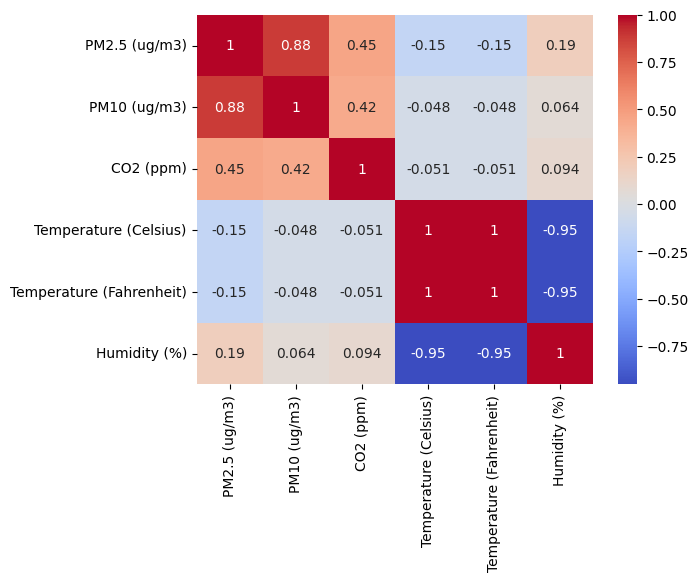

In [11]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [12]:
from sklearn.model_selection import train_test_split

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

In [14]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Parameter awal (bisa di-tune)
dbscan = DBSCAN(eps=0.5, min_samples=5)
train_clusters = dbscan.fit_predict(X_train_scaled)

# Jumlah cluster dan noise
n_clusters = len(set(train_clusters)) - (1 if -1 in train_clusters else 0)
n_noise = list(train_clusters).count(-1)

print(f"✅ Number of clusters found: {n_clusters}")
print(f"⚠️ Number of noise points: {n_noise}")
print(f"📊 Cluster labels: {np.unique(train_clusters)}")

✅ Number of clusters found: 10
⚠️ Number of noise points: 605
📊 Cluster labels: [-1  0  1  2  3  4  5  6  7  8  9]


In [15]:
# Hanya evaluasi jika ada lebih dari 1 cluster (bukan semua noise)
if n_clusters > 1:
    try:
        sil_score = silhouette_score(X_train_scaled, train_clusters)
        print(f"🟢 Silhouette Score: {sil_score:.4f}")
    except ValueError as e:
        print(f"🟡 Silhouette Score: Cannot compute (likely because of noise or single cluster) — {e}")

    try:
        db_index = davies_bouldin_score(X_train_scaled, train_clusters[train_clusters != -1])
        print(f"🔵 Davies-Bouldin Index: {db_index:.4f}")
    except ValueError as e:
        print(f"🟡 Davies-Bouldin: Cannot compute — {e}")
else:
    print("🔴 Only 1 cluster or all noise — clustering quality metrics not applicable.")


🟢 Silhouette Score: -0.1436
🟡 Davies-Bouldin: Cannot compute — Found input variables with inconsistent numbers of samples: [23652, 23047]


In [ ]:
X_train_scaled

array([[-1.58503773e+00, -8.03544189e-01, -3.99027108e-01,
        -6.11104426e-01, -6.48622162e-01, -6.28020103e-01],
       [-4.89428755e-01,  2.10786569e+00, -3.99027108e-01,
        -3.48980865e-01, -8.81083031e-01,  2.72281081e-01],
       [ 6.06180221e-01,  1.56197634e+00, -3.99027108e-01,
         2.53437830e+00, -6.74699883e-02,  2.19072592e-03],
       ...,
       [ 6.06180221e-01,  1.19805010e+00, -9.74364797e-01,
         1.28929139e+00,  8.62373489e-01, -1.79841164e+00],
       [ 6.06180221e-01, -8.94525747e-01, -3.99027108e-01,
         2.40797147e-01,  5.13682185e-01,  6.77416614e-01],
       [-1.58503773e+00,  2.10786569e+00, -3.99027108e-01,
        -8.73227987e-01, -9.97313466e-01, -6.73035163e-01]])

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
# Silhouette Score: Higher value means better defined clusters (range -1 to 1)
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index: Lower value means better clustering (0 indicates perfect separation)
db_index = davies_bouldin_score(X_train_scaled, train_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: -0.14355993240291762
Davies-Bouldin Index: 1.3753778682150875
